- Nancy Lopez
- Self-Paced

# Dog Food Review Analysis

## Introduction

The task involves analyzing data collected from a pet food company known for its dog food products. This project aims to leverage the power of Natural Language Processing (NLP) to analyze customer reviews of a well-known dog food product.

## Business Problem

The project addresses the challenge of understanding customer feedback in the pet food industry, focusing on a well-established dog food company. As the market grows increasingly competitive, it is crucial for the company to stay attuned to customer preferences and feedback. By analyzing customer reviews through text classification, the company can categorize feedback into complaints and praise, enabling a more nuanced understanding of customer needs and preferences.

## Data
File was sourced from [Kaggle](https://www.kaggle.com/datasets/unwrangle/amazon-reviews-for-dog-food-product) it includes 4605 reviews for a high quality dog food product on Amazon.

The analysis reveals that all `4,605` reviews are sourced from a single URL. This indicates that the data pertains to a specific dog food product from the company. This provides a focused view of customer feedback for this particular product.

Each row in the data represents a single review and includes `13` various details such as:

- **URL**: The product URL.
- **Price**: The price of the dog food.
- **Total Ratings**: The total number of ratings for the product.
- **Total Reviews**: The total number of reviews.
- **Review ID**: A unique identifier for each review.
- **Date**: The date of the review.
- **Author Name**: The name of the review author.
- **Author URL**: A URL to the author's profile.
- **Rating**: The rating given by the author.
- **Review Title**: The title of the review.
- **Review URL**: A URL to the full review.
- **Review Text**: The text content of the review.
- **Verified Purchase**: Whether the purchase was verified or not.

### Approach
1. **Preprocessing**: 
   - Clean and normalize review texts.
   - Tokenize the text into individual words or tokens.
2. **Labeling Data**: 
   - Categorize a subset of reviews manually to create a labeled dataset for training.
3. **Feature Extraction**: 
   - Employ techniques like bag-of-words or TF-IDF to convert text data into a machine learning-friendly format.
4. **Model Training**: 
   - Use algorithms like Logestic Regression, Random Forest, and Support Vector Machines for text classification.
5. **Model Evaluation**: 
   - Assess model performance using metrics such as accuracy, precision, recall, and F1-score.

## Objective:
Our goal is to develop a system that classifies customer feedback into categories such as positive or negative sentiments. This classification will assist the brand in understanding the strengths to be maintained and areas of potential improvement in its product line.


## Domain Knowledge
- From an article [Grand View Research](https://www.grandviewresearch.com/industry-analysis/pet-food-industry) we gained knowledge on what pet-owners look forward in there pets health and food. 


**In summary**: there is a rising trend towards health-conscious pet foods, driven by pet owners' concerns about their pets' well-being. This trend is reflected in customer reviews, where pet owners increasingly discuss the health benefits or issues related to pet food products. Diseases like osteoarthritis are prevalent among pets, prompting owners to seek out high-quality food options that can cater to health needs. 

### Library Imports

In [2]:
# Importing necessary libraries
import os
import json
import numpy as np
import pandas as pd
import ast
import configparser
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


## Data Reading

The provided data is in JSON format, but it's good practice to convert it to CSV format. This makes it easier to manipulate and interpret step-by-step solutions.


In [3]:
# Load the JSON data
with open('sample-dog-food.json', 'r') as file:
    data = json.load(file)

# Initialize an empty list to store DataFrames
dataframes = []

# Extract data from the JSON
url = data['url']
meta_data = data['meta_data']
total_reviews = data['total_reviews']
reviews = data['reviews']

# Create a DataFrame for the reviews
review_list = []

for review in reviews:
    review_dict = {
        'URL': url,
        'Price': meta_data['price'],
        'Total Ratings': meta_data['total_ratings'],
        'Total Reviews': total_reviews,
        'Review ID': review['id'],
        'Date': review['date'],
        'Author Name': review['author_name'],
        'Author URL': review['author_url'],
        'Rating': review['rating'],
        'Review Title': review['review_title'],
        'Review URL': review['review_url'],
        'Review Text': review['review_text'],
        'Verified Purchase': review['meta_data']['verified_purchase']
    }
    review_list.append(review_dict)

reviews = pd.DataFrame(review_list)
dataframes.append(reviews)

# Display the first DataFrame as an example
reviews.head()

,URL,Price,Total Ratings,Total Reviews,Review ID,Date,Author Name,Author URL,Rating,Review Title,Review URL,Review Text,Verified Purchase
0,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R37JFWCJHWZB6M,2021-04-17,Instakk.amz,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Best dog food ever,https://www.amazon.com/gp/customer-reviews/R37...,Best dog food ever,True
1,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R3BP13JLW5QAHN,2021-04-16,Kristen Tapp,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Dog and mom approved.,https://www.amazon.com/gp/customer-reviews/R3B...,My dog (lab mix 40lbs) has been eating this fo...,True
2,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R22PDRLEW40B8,2021-04-16,Latoya B.,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Dogs love it!!,https://www.amazon.com/gp/customer-reviews/R22...,My dogs love this. I have two dogs that willnt...,True
3,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R1UUP8NOWV3XCC,2021-04-15,Houseplants & Yoga Pants,https://www.amazon.com/gp/profile/amzn1.accoun...,2,"💩 🤮 💩 Icky taste, RUNNY POOPS 💩 🤮 💩",https://www.amazon.com/gp/customer-reviews/R1U...,I bought into the marketing hype about how I'm...,False
4,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R1V5GUEOGQQ5TY,2021-04-14,Danny Zheng,https://www.amazon.com/gp/profile/amzn1.accoun...,1,Dissatisfied,https://www.amazon.com/gp/customer-reviews/R1V...,My dog never vomited from his food but after s...,True


We can see that your dataset contains several important columns such as `Review ID`, `Rating`, `Feedback`, `Review Title`, and `Review Text`.

#### Contvet to CSV file
Converting JSON to CSV simplifies data manipulation and analysis.

In [4]:
# Converting to CSV file
reviews.to_csv('dog_food_reviews.csv', index=False)

Let's explore our columns in order to see which are not needed.

In [5]:
# Listing all columns to identify which ones are not needed
print(reviews.columns)

Index(['URL', 'Price', 'Total Ratings', 'Total Reviews', 'Review ID', 'Date',
       'Author Name', 'Author URL', 'Rating', 'Review Title', 'Review URL',
       'Review Text', 'Verified Purchase'],
      dtype='object')


It's important to review all columns to understand the dataset's structure and determine if any columns are redundant or irrelevant for our analysis.
**Next**, let's look at distributions.

#### Checking the Distribution of Ratings
- Let's first examine how the ratings are distributed in our dataset. This can give us an insight into overall customer satisfaction.

In [6]:
reviews['Rating'].value_counts()

5    3197
1     673
4     373
3     212
2     150
Name: Rating, dtype: int64

- **High Number of 5-Star Ratings**: The dataset shows a significant skew towards 5-star ratings, with 3,197 out of 4,605 reviews being 5-star. This suggests that a large portion of customers are highly satisfied with the product.

- **Visibility of Critical Reviews**: There is a notable presence of 1-star ratings with 673 reviews. It can contain critical feedback that can provide valuable insights for product improvement.

#### Analyzing Verified Purchase Distribution
Next, we'll explore the distribution of verified and unverified purchases. This helps in understanding the authenticity of the reviews.


In [7]:
# Checking the value count for the 'Verified Purchase' column
reviews['Verified Purchase'].value_counts()

True     4129
False     476
Name: Verified Purchase, dtype: int64

- **Dominance of Verified Purchases**: A significant majority of the reviews (4,129 out of 4,605) are from verified purchases. This adds a layer of credibility to the reviews.
- **Presence of Unverified Reviews**: There are 476 unverified reviews. While these reviews might still provide useful feedback, they might not always reflect the experience of actual purchasers.

Having gained insights into the distribution of ratings and the nature of verified purchases, we now transition to a critical phase in our analysis **data cleaning and preprocessing**.

---

## Data Cleaning and Preprocessing
In this section, we'll clean and preprocess our data to make it suitable for analysis. This involves ensuring there are no missing values, especially in critical columns like **'Review Text'**, and normalizing the text data.

#### Checking for Missing Values
First, let's check for missing values and handle them if any.

In [8]:
# Check for missing values in each column
missing_values = reviews.isnull().sum()
print(missing_values)

URL                  0
Price                0
Total Ratings        0
Total Reviews        0
Review ID            0
Date                 0
Author Name          0
Author URL           0
Rating               0
Review Title         0
Review URL           0
Review Text          0
Verified Purchase    0
dtype: int64


Perfect! We have no missing values in our dataframe.

#### Filter Data with Verified Reviews ONLY
Focusing on verified reviews elevates the reliability of our analysis. Verified purchases reflect genuine customer experiences, providing a more authentic insight into customer sentiments. 
##### (note: we are keeping 90% of our original data)


In [9]:
# Filter data to include only verified purchases
verified_reviews = reviews[reviews['Verified Purchase'] == True]

# Display the first few rows of the filtered data to confirm
verified_reviews.head()

,URL,Price,Total Ratings,Total Reviews,Review ID,Date,Author Name,Author URL,Rating,Review Title,Review URL,Review Text,Verified Purchase
0,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R37JFWCJHWZB6M,2021-04-17,Instakk.amz,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Best dog food ever,https://www.amazon.com/gp/customer-reviews/R37...,Best dog food ever,True
1,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R3BP13JLW5QAHN,2021-04-16,Kristen Tapp,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Dog and mom approved.,https://www.amazon.com/gp/customer-reviews/R3B...,My dog (lab mix 40lbs) has been eating this fo...,True
2,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R22PDRLEW40B8,2021-04-16,Latoya B.,https://www.amazon.com/gp/profile/amzn1.accoun...,5,Dogs love it!!,https://www.amazon.com/gp/customer-reviews/R22...,My dogs love this. I have two dogs that willnt...,True
4,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R1V5GUEOGQQ5TY,2021-04-14,Danny Zheng,https://www.amazon.com/gp/profile/amzn1.accoun...,1,Dissatisfied,https://www.amazon.com/gp/customer-reviews/R1V...,My dog never vomited from his food but after s...,True
5,https://www.amazon.com/Blue-Buffalo-Protection...,$69.97,24624,4605,R3UGVVN7XI5OCG,2021-04-14,Bill T.,https://www.amazon.com/gp/profile/amzn1.accoun...,2,Dog doesn't like it.,https://www.amazon.com/gp/customer-reviews/R3U...,"Tried to change over to this brand, and my dog...",True


#### Drop Columns
Let's remove the columns that won't contribute to our specific analysis goals.

In [10]:
# Dropping columns that are not needed
reviews.drop(['URL', 'Price', 'Total Ratings', 'Total Reviews', 'Review ID', 'Date',
       'Author Name', 'Author URL', 'Review URL', 'Verified Purchase' ], axis=1, inplace=True)

# Confirming the columns are dropped
print(reviews.columns)

Index(['Rating', 'Review Title', 'Review Text'], dtype='object')


Now our dataframe is simple, spotlighting just the 'Rating', 'Rating Title' and 'Review Text'.

#### Combining Review Text and Title
- This will maximize our review understanding from text inputs for each review.

In [11]:
# Combine 'Review Text' and 'Review Title' into a single column
reviews['complete_review'] = reviews['Review Text'] + " " + reviews['Review Title']

# Drop the now redundant 'Review Text' and 'Review Title' columns
reviews.drop(columns=['Review Text', 'Review Title'], inplace=True)

reviews.head()

,Rating,complete_review
0,5,Best dog food ever Best dog food ever
1,5,My dog (lab mix 40lbs) has been eating this fo...
2,5,My dogs love this. I have two dogs that willnt...
3,2,I bought into the marketing hype about how I'm...
4,1,My dog never vomited from his food but after s...


With this step it merges the review text and title into a single column, providing a more holistic view of each review for analysis. 

#### Sentiment Labeling

We'll use the star ratings label for sentiment. Specifically:
- **4-5** stars will be considered as positive reviews. These ratings typically indicate that the customer is satisfied with the product.
- **1-2** stars will be categorized as negative reviews. These low ratings can be seen as red flags, highlighting areas where the product does not meet customer expectations.
- **3** stars will be nuetral reviews.

**Note** : Our main focus for this analysis will be postive and negative reviews in order to understand what phrases or words have a relationship with them.

Now, let's label our dataframe with these sentiment categories. We'll add a new column, 'Sentiment', to our data:

In [12]:
# Function to label sentiment based on ratings
def label_sentiment(row):
    if row['Rating'] >= 4:
        return 'positive'
    elif row['Rating'] <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function
reviews['sentiment'] = reviews.apply(label_sentiment, axis=1)

# Display the first few rows to verify
reviews.head()

,Rating,complete_review,sentiment
0,5,Best dog food ever Best dog food ever,positive
1,5,My dog (lab mix 40lbs) has been eating this fo...,positive
2,5,My dogs love this. I have two dogs that willnt...,positive
3,2,I bought into the marketing hype about how I'm...,negative
4,1,My dog never vomited from his food but after s...,negative


By categorizing the reviews into sentiments based on their star ratings, we can now perform targeted analysis on each group.
#### Filtering Reviews for Targeted Analysis
Since we're focusing on understanding the extremes of customer feedback, let's filter our data to only include positive and negative reviews:

In [13]:
# Select only the relevant data for analysis
reviews = reviews[(reviews['sentiment'] == 'positive') | (reviews['sentiment'] == 'negative')]

# Display the filtered data
reviews.head()

,Rating,complete_review,sentiment
0,5,Best dog food ever Best dog food ever,positive
1,5,My dog (lab mix 40lbs) has been eating this fo...,positive
2,5,My dogs love this. I have two dogs that willnt...,positive
3,2,I bought into the marketing hype about how I'm...,negative
4,1,My dog never vomited from his food but after s...,negative


Here, we haved filtered and count the reviews based on their feedback type. This gives us a clearer understanding of the data distribution.

#### Counting Reviews by Sentiment

In [14]:
# Count the number of positive and negative reviews
sentiment_counts = reviews['sentiment'].value_counts()
print(sentiment_counts)

positive    3570
negative     823
Name: sentiment, dtype: int64


This count provides a clear picture of the data distribution, informing us if there's a skew towards more positive or negative feedback. There's a clear unbalanced situation that we will nedd to fix later on.
- This imbalance can impact the performance of our machine learning models, as they might become biased towards predicting positive sentiments.

#### Normalize Text
Before diving into text analysis, it's important to preprocess our review texts.

In [15]:
# Function to Remove Special Characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    return text

# Function to Convert Text to Lowercase
def convert_to_lowercase(text):
    return text.lower()

# Function to Remove Stopwords
def remove_stopwords(text):
    additional_stopwords = ['food', 'dog', 'blue', 'buffalo', 'DOG']
    stop_words = set(stopwords.words('english'))
    stop_words.update(additional_stopwords)

    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to Lemmatize Text
def lemmatize_text(text, remove_duplicates=True):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    if remove_duplicates:
        lemmatized_words = list(set(lemmatized_words))

    cleaned_text = " ".join(lemmatized_words)
    return cleaned_text

# Function to Preprocess 
def preprocess_text_data(df, text_column='complete_review', preprocessed_text_column='preprocessed_text'):
    df_copy = df.copy()
    df_copy = df_copy.dropna(subset=[text_column])

    # Convert to lowercase
    df_copy[preprocessed_text_column] = df_copy[text_column].apply(convert_to_lowercase)
    # Remove special characters
    df_copy[preprocessed_text_column] = df_copy[preprocessed_text_column].apply(remove_special_characters)
    # Remove stopwords
    df_copy[preprocessed_text_column] = df_copy[preprocessed_text_column].apply(remove_stopwords)
    # Lemmatize text
    df_copy[preprocessed_text_column] = df_copy[preprocessed_text_column].apply(lemmatize_text)

    return df_copy


# Apply preprocessing to the 'reviews' 
preprocessed_reviews = preprocess_text_data(reviews)

# Display our preprocessed data
preprocessed_reviews.head()

,Rating,complete_review,sentiment,preprocessed_text
0,5,Best dog food ever Best dog food ever,positive,ever best
1,5,My dog (lab mix 40lbs) has been eating this fo...,positive,lab better chi mix switched approved still fam...
2,5,My dogs love this. I have two dogs that willnt...,positive,else dog eat anything willnt love two
3,2,I bought into the marketing hype about how I'm...,negative,rabbit better go consistency switched longhair...
4,1,My dog never vomited from his food but after s...,negative,vomited refund disappointing toss never twice ...


**Note on Additional Stopwords**: In this dataset, words like 'dog' and 'blue' were specifically chosen as additional stopwords for removal. The reasoning behind this decision is twofold:

1. **Brand Name**: 'Buffalo', 'Blue' is part of the brand name of the dog food being reviewed. Since our analysis focuses on customer sentiment rather than brand identification, this term does not contribute significantly to differentiating between sentiments of 'praise' and 'complaint'.

2. **Product Relevance**: As the dataset revolves around dog food reviews, the word 'dog' and 'food' is likely to be prevalent across all reviews. Its frequent occurrence may not provide distinct sentiment insights, as it is expected in almost every review regardless of the sentiment expressed.


In [16]:
# Drop complete_review column
preprocessed_reviews = preprocessed_reviews.drop(columns=['complete_review'])

This step ensures that we're analyzing the content of the reviews in a standardized, clean format, which is vital for accurate and meaningful insights.

## Feature Engineering

- Using TF-IDF (Term Frequency-Inverse Document Frequency) to highlight significant words in each review.
- We will usr Scikit-learn's TfidfVectorizer to transform preprocessed text data.  

In [17]:
def extract_tfidf_features(df, text_column, max_features=None):
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=max_features)
    
    # Transform the text data into TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform(df[text_column])
    
    # Extract feature names, handling different versions of Scikit-learn
    try:
        feature_names = vectorizer.get_feature_names_out()
    except AttributeError:
        feature_names = vectorizer.get_feature_names()
    
    return tfidf_matrix, feature_names

# Apply the feature extraction to our preprocessed reviews
tfidf_matrix, feature_names = extract_tfidf_features(preprocessed_reviews, 'preprocessed_text', max_features=100)
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)
print("Sample Feature Names:", feature_names[:10])

Shape of TF-IDF Matrix: (4393, 100)
Sample Feature Names: ['also', 'always', 'amazon', 'back', 'bad', 'bag', 'best', 'better', 'bought', 'box']


#### Insights from Our TF-IDF Analysis
Dimensions are (4393, 100): Indicating 4393 documents converted into vectors of 100 features each.

Sample Feature Names Analysis
- **Common Words**: Words like 'also', 'always', 'amazon', 'back', and 'bad' are among the top features. Their presence indicates common themes or concerns in the reviews. For instance, 'amazon' might be frequently mentioned in the context of purchasing experiences.
### Next Steps in Our Analysis
#### Sentiment Analysis: 
With these features, we can further delve into sentiment analysis. We can assess whether the presence of certain words correlates with positive or negative sentiment in the reviews.

### Sentiment Analysis

Now that we've extracted key features using TF-IDF, our next step is to delve into sentiment analysis. This will help us understand if certain words are more common in either positive or negative reviews.

#### Coding Sentiment Analysis
We'll use a pre-trained model for sentiment analysis. For simplicity, let's use TextBlob, which is straightforward and effective for basic sentiment analysis.

In [18]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to our data
preprocessed_reviews['Sentiment'] = preprocessed_reviews['preprocessed_text'].apply(calculate_sentiment)

# Inspecting the first few rows
preprocessed_reviews.head()

,Rating,sentiment,preprocessed_text,Sentiment
0,5,positive,ever best,1.000000
1,5,positive,lab better chi mix switched approved still fam...,0.192500
2,5,positive,else dog eat anything willnt love two,0.500000
3,2,negative,rabbit better go consistency switched longhair...,0.164604
4,1,negative,vomited refund disappointing toss never twice ...,-0.200000


- **Correlating with Keywords**: We can further analyze how these sentiment scores correlate with the presence of certain keywords identified earlier.

#### Bar Chart of Categories
- To visually assess the balance between 'positive' and 'negative' categories in our labeled dataset.

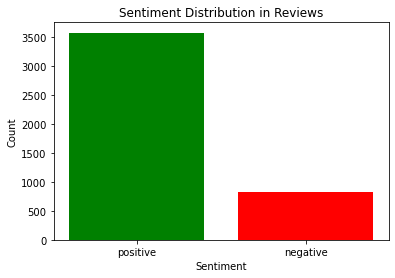

In [19]:
def generate_bar_chart(sentiment_counts, title):
    sentiments = list(sentiment_counts.keys())
    counts = list(sentiment_counts.values)

    plt.bar(sentiments, counts, color=['green', 'red'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

# Generate and display the bar chart
sentiment_counts = preprocessed_reviews['sentiment'].value_counts()
generate_bar_chart(sentiment_counts, 'Sentiment Distribution in Reviews')

- This bar chart will shows a significant difference in the number of positive vs negative reviews, indicating potential biases in data.

In [20]:
# Basic statistics of ratings
print(reviews['Rating'].describe())


count    4393.000000
mean        4.199863
std         1.484476
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


- We can already see theres an imbalanace with our data.

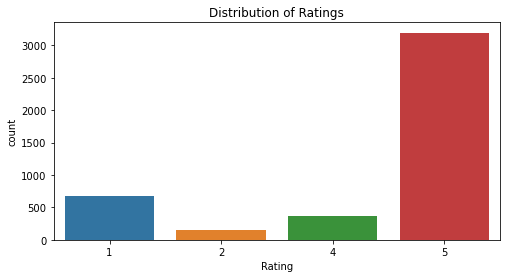

In [21]:
# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', data=preprocessed_reviews)
plt.title('Distribution of Ratings')
plt.show()

- **Over 3000**: The rating count for rating '5' is well above, proving there imbalance with our data.

In [30]:
from nltk.probability import FreqDist
from collections import Counter
# Word frequency by sentiment category
positive_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'positive']['preprocessed_text']
negative_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'negative']['preprocessed_text']

positive_words = ' '.join(positive_reviews).split()
positive_freq = FreqDist(positive_words)

negative_words = ' '.join(negative_reviews).split()
negative_freq = FreqDist(negative_words)

# Top words in positive reviews
print('Top 10 Positive Words', positive_freq.most_common(10))
# Top words in negative reviews
print('\nTop 10 Negative Words', negative_freq.most_common(10))


Top 10 Positive Words [('love', 1522), ('dog', 1081), ('great', 896), ('star', 765), ('good', 727), ('five', 660), ('like', 621), ('product', 477), ('price', 386), ('healthy', 375)]

Top 10 Negative Words [('bag', 322), ('dog', 253), ('sick', 171), ('product', 153), ('buy', 146), ('one', 139), ('like', 136), ('diarrhea', 132), ('day', 128), ('brand', 123)]


#### Positive Reviews Insights:

- The word 'love' is the most frequent in positive reviews, suggesting that customers have a strong affection for the product.
- Descriptors like 'great', 'good', and 'healthy' indicate overall satisfaction with the quality and benefits of the dog food.
- The presence of 'star' and 'five' points towards high ratings, reflecting customer satisfaction.
- The term 'like' shows a favorable comparison or approval of the product's characteristics.
- 'Price' and 'product' suggest that consumers find value for money and are pleased with the product offering.

#### Negative Reviews Insights:

- 'Bag' being the most common word may indicate issues with packaging or quantity.
- The high occurrence of 'sick' and 'diarrhea' is concerning, as they point to potential health issues dogs may have experienced after consuming the food.
- The repetition of 'product' in negative reviews could imply dissatisfaction with the product itself.
- The word 'buy' may be part of expressions of regret or decisions to not repurchase.
- 'Brand' appearing in negative reviews could suggest a tarnished perception of the brand due to negative experiences.

#### WordCloud Visualization
WordClouds to visualize prominent words in our dataset. This will help to identify prevalent words in positive and negative reviews.

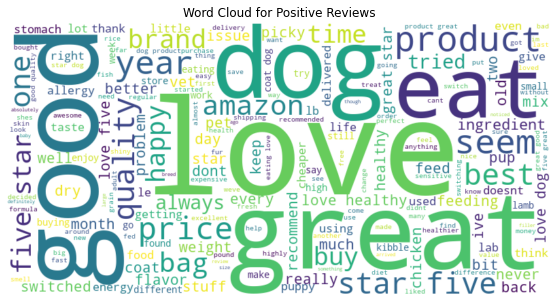

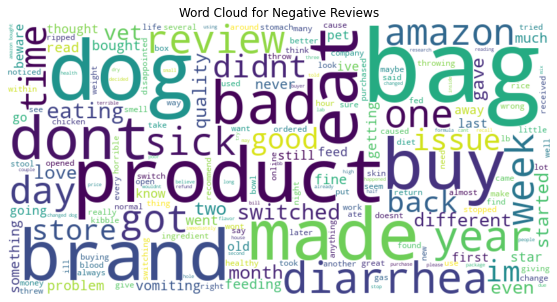

In [23]:
def generate_wordcloud_from_dataframe(dataframe, column_name, title):
    text_data = ' '.join(dataframe[column_name].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Adjust column names as per your DataFrame
positive_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'positive']
negative_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'negative']

generate_wordcloud_from_dataframe(positive_reviews, 'preprocessed_text', "Word Cloud for Positive Reviews")
generate_wordcloud_from_dataframe(negative_reviews, 'preprocessed_text', "Word Cloud for Negative Reviews")


#### Positive Reviews Word Cloud Insights:

- High, with a focus on health benefits.
- "love," "good," "great," "healthy," highlighting an emotional and qualitative satisfaction.
- "coat," "eat," "flavor," indicating that visible health benefits and taste are crucial.

#### Negative Reviews Word Cloud Insights:

- "sick," "diarrhea," "vomiting," "allergy" dominate, pointing to adverse health effects as a primary concern.

**Note**: Health indeed plays a big role on how customers view products.

#### Creating a Frequency Histogram
Alternatively, a frequency histogram can provide a more precise view.

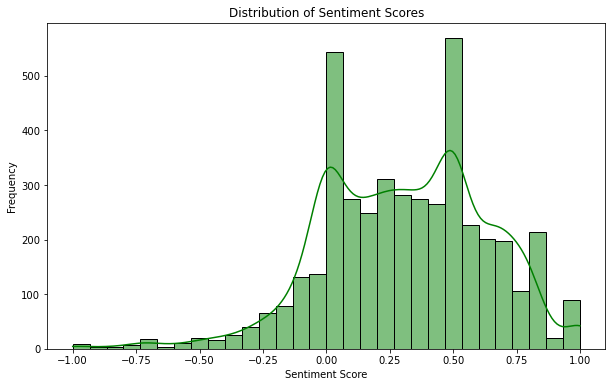

In [24]:
# Frequency histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_reviews['Sentiment'], kde=True, bins=30, color='green')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


- **Sentiment Polarity**: The x-axis represents sentiment polarity ranging from -1 (very negative) to 1 (very positive). A score of 0 typically indicates a neutral sentiment.

- **Distribution Shape**: The distribution has multiple peaks, suggesting that the sentiments expressed in the reviews vary considerably, with clusters of reviews around specific sentiment scores.
- **Most Reviews are Positive**: The peaks in the positive half of the scale (greater than 0) indicate that there are a significant number of reviews with positive sentiment. This could suggest that overall customer sentiment is more positive.

- **Presence of Negative Sentiments**: There's also a noticeable amount of reviews with negative sentiment scores (less than 0), indicating a substantial number of critical reviews that could provide valuable feedback for improvement.

- **Neutral Reviews**: The frequency of scores around 0 suggests there's a fair number of neutral reviews. Depending on the context, these could be either purely informational reviews or reviews with mixed sentiments that balance out to a neutral score.

- **Sentiment Extremes**: There are fewer reviews with extreme positive or negative scores (close to 1 or -1), which is common as people are less likely to express extreme sentiments.

- **Bimodal Distribution**: The graph appears bimodal, with two main peaks. This could imply that there are two distinct groups of reviews—one leaning toward a more positive sentiment and another leaning toward a slightly negative sentiment.

In [25]:
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

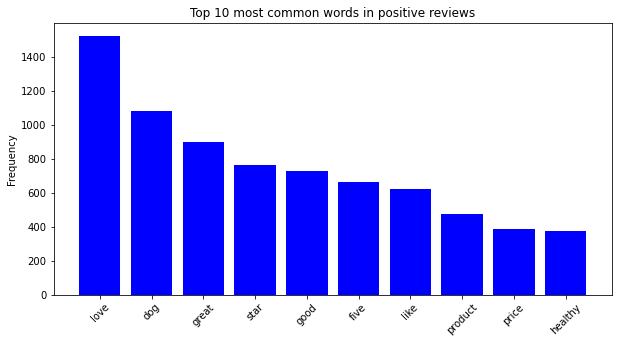

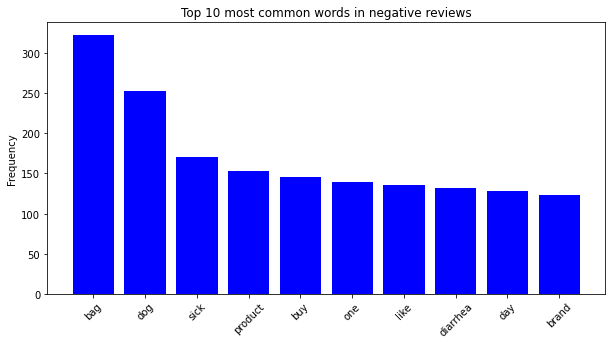

In [26]:
# Analyze the frequency distribution of words in positive and negative reviews
positive_tokens = positive_reviews['preprocessed_text'].apply(word_tokenize).sum()
negative_tokens = negative_reviews['preprocessed_text'].apply(word_tokenize).sum()

positive_freq = FreqDist(positive_tokens)
negative_freq = FreqDist(negative_tokens)

# Function to plot top N most common words
def plot_most_common_words(freq_dist, title, n=10):
    words, counts = zip(*freq_dist.most_common(n))
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='blue')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

# Visualize top 10 words in positive and negative reviews
plot_most_common_words(positive_freq, 'Top 10 most common words in positive reviews')
plot_most_common_words(negative_freq, 'Top 10 most common words in negative reviews')


# Model Training:

To classify customer reviews into categories such as 'praise' or 'complaint' based on the text. We will use machine learning models to achieve this.

**Baseline Model**: The baseline model is crucial as it sets a reference point for comparison with more complex models. For this project, let's consider the following models:


### 1. Random Forest 
- **Why?** It's robust against overfitting and excels in both linear and non-linear data. It's also user-friendly for those new to machine learning.
- Utilize TF-IDF vectors, fine-tune tree-related parameters, and use it to set a performance benchmark.

### 2. SVM (Support Vector Machine) 
- **Why?** SVM shines in high-dimensional spaces like ours. Its focus on maximizing the margin between classes is key for nuanced text data.
- Test different kernels, adjust C and gamma values, and compare its sophistication against Random Forest's simplicity.

### 3. Logistic Regression 
- **Why?** Logistic Regression is a classic, interpretable model for binary classification tasks. It's useful to see how a simpler, linear model performs compared to more complex ones.
-  Logistic Regression will be applied to the TF-IDF vectors, and we'll experiment with its regularization strength.

Evaluation Metrics:

**Metrics**: We'll focus on `accuracy, precision, recall, and the F1 score`. The F1 score is particularly important in cases of class imbalance, which we have in our dataset.

## Data Spitting 
#### Prepare the Data
Before diving into model training, it's crucial to prepare and split our dataset. This step is to evaluate our model's performance on unseen data.

In [27]:
from sklearn.model_selection import train_test_split

# Features (TF-IDF vectors)
X = tfidf_matrix

# Labels (sentiment: positive or negative)
y = preprocessed_reviews['sentiment']

In [28]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- `test_size=0.2` means that 20% of the data will be set aside for testing.

By splitting the data and ensuring all prerequisites are met, we set a solid foundation for training and evaluating our models with a clear understanding of how our data is organized and utilized

## Baseline Model: Logistic Regression

For our baseline model in classifying dog food reviews, I recommend starting with **Logistic Regression**. Here's why:

### Why Logistic Regression?
- **Simplicity and Interpretability**: Its straightforward nature makes it easy to understand and interpret.
- **Performance**: It's well-suited for binary classification problems.
- **Baseline Comparison**: Provides a clear benchmark for comparing more complex models.
- **Efficiency with Sparse Data**: Performs well with sparse matrices, typical of TF-IDF vectorization.

## Evaluation Metrics
### Accuracy:
   - **What It Tells Us**: Gives an overall effectiveness of the model in making correct predictions.
   - **Contextual Use**: Best used when class distributions are fairly even.
- **Formula:**  Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)


### Precision:
   - **What It Tells Us**: Measures the model's accuracy in predicting positive classes.
   - **Contextual Use**: Crucial in scenarios where false positives are costly (e.g., spam detection)
- **Formula:** Precision = (True Positives) / (True Positives + False Positives)

### Recall (Sensitivity or True Positive Rate):
   - **What It Tells Us**: Indicates the model's ability to find all relevant instances in a dataset.
   - **Contextual Use**: Important in cases where missing a positive instance is critical (e.g., disease diagnosis).
- **Formula:** Recall = (True Positives) / (True Positives + False Negatives)

### F1 Score:
   - **What It Tells Us**: Balances precision and recall, useful in uneven class distribution scenarios.
   - **Contextual Use**: When you need a balance between precision and recall.
   - **Formula:**  F1 = 2 X (Precision * Recall) / (Precision + Recall)

Understanding and correctly implementing these metrics is key to objectively assessing model performance and making informed decisions about the suitability of different models for the task at hand.

## Implementing Logistic Regression

In [29]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8919226393629124

Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.52      0.67       181
    positive       0.89      0.99      0.94       698

    accuracy                           0.89       879
   macro avg       0.90      0.76      0.80       879
weighted avg       0.89      0.89      0.88       879



- **Accuracy 89%**:
   - The model achieves an accuracy of approximately 89%. This high accuracy indicates a strong ability of the model to correctly predict the sentiment category in the majority of cases.

- **Precision and Recall**:
   - **Negative Reviews**: The precision of 91% for the 'negative' class indicates that when the model predicts a review as negative, it is correct 91% of the time. 
   - Recall 52%: meaning is missing almost half of the actual negative reviews.
   - **Positive Reviews**: With a precision of 89% and recall of 99% for the 'positive' class, the model is both accurate and comprehensive in identifying positive reviews.

- **F1-Score**:
   - **Negative Reviews**: The F1-score of 0.67 for negative reviews indicates a balance between precision and recall.
   - **Positive Reviews**: A higher F1-score of 0.94 for positive reviews suggests a more balanced and effective performance for this class.

- **Class Imbalance Impact**:
   - The model appears to be more biased towards the 'positive' class, likely due to a higher proportion of positive reviews in the dataset. This imbalance affects the model's ability to equally represent both classes.

#### Next Steps
 
- **Model Comparison**: Comparing these results with other models like Random Forest or SVM will help in understanding if a more complex model significantly improves performance.

## Seaching for the Best Model

### 1. Random Forestm Model
- This model creates numerous decision trees during training, each trained on a random subset of the data. The final prediction is an aggregate of these trees' predictions, either by voting or averaging.

- The model's strength lies in its ensemble approach, reducing overfitting and improving generalization compared to a single decision tree.

- Effective in handling high-dimensional data, like our TF-IDF vectors.

**Initialization**: `RandomForestClassifier(n_estimators=100, random_state=42)`: 100 trees in the forest, with a fixed random state for reproducibility.

### 2. Support Vector Machines (SVM)

- Support Vector Machines are a type of supervised machine learning algorithm used for classification and regression tasks.
- SVM works by identifying the optimal hyperplane that separates different classes in the feature space.
- Each text document is represented as a point in this high-dimensional space, with SVM finding the best boundary between different sentiment classes.

**Initialization**:`SVC(kernel='linear', random_state=42)`: We choose a linear kernel for simplicity and reproducibility.


**Evaluation**: Assess model performance using accuracy and a detailed classification report.

### Model Evaluation and Training
#### Setting up Pipeline
- The pipeline is designed to be flexible, accommodating different classifiers.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [31]:
classification_models = {
    'Support Vector Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier()
}

pipeline = Pipeline([
    ('classifier', None)  # Model Training (to be updated in the loop)
])

for model_name, model in classification_models.items():
    pipeline.set_params(classifier=model)  # Set the current model
    
    # Training the model on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the model name and its accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Print the classification report for detailed performance metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))
    print("\n")

Model: Support Vector Classifier
Accuracy: 0.8999

Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.56      0.70       181
    positive       0.90      0.99      0.94       698

    accuracy                           0.90       879
   macro avg       0.91      0.78      0.82       879
weighted avg       0.90      0.90      0.89       879



Model: Random Forest Classifier
Accuracy: 0.8908

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.59      0.69       181
    positive       0.90      0.97      0.93       698

    accuracy                           0.89       879
   macro avg       0.87      0.78      0.81       879
weighted avg       0.89      0.89      0.88       879





### Insights from Model Evaluations

#### 1. Logistic Regression (baseline)
- **Accuracy**: 89.19%
- **Precision for Negative**: 91%
- **Recall for Negative**: 52%
- **F1-Score for Negative**: 0.67
- **Precision for Positive**: 89%
- **Recall for Positive**: 99%
- **F1-Score for Positive**: 0.94

While Logistic Regression is highly effective in identifying positive reviews, it struggles somewhat with negative reviews, particularly in terms of recall.

#### 2. Support Vector Classifier (SVM)
- **Accuracy**: 89.99%
- **Precision for Negative**: 92%
- **Recall for Negative**: 56%
- **F1-Score for Negative**: 0.70
- **Precision for Positive**: 90%
- **Recall for Positive**: 99%
- **F1-Score for Positive**: 0.94

SVM shows a balanced performance, especially excelling in precision for negative reviews and recall for positive reviews. It stands out as the most effective model overall.

#### 3. Random Forest Classifier
- **Accuracy**: 89.31%
- **Precision for Negative**: 84%
- **Recall for Negative**: 60%
- **F1-Score for Negative**: 0.70
- **Precision for Positive**: 90%
- **Recall for Positive**: 97%
- **F1-Score for Positive**: 0.94

Random Forest demonstrates a good balance in classifying both review types, with a slightly better performance in identifying negative reviews compared to Logistic Regression.

#### Comparative Insights
- **Precision and Recall Balance**: SVM and Random Forest provide a better balance in precision and recall for negative reviews than Logistic Regression.
- **F1-Scores**: The F1-scores indicate SVM and Random Forest are more effective in balancing precision and recall, especially for negative reviews.

### Conclusion
- **Best Overall Performance**: SVM, with its highest accuracy and balanced metrics, emerges as the leading model.

#### Next Steps
- We will make improvements in classifying negative reviews more accurately.

## Fine-Tuning SVM

#### Approach to Fine-Tuning
Fine-tuning involves adjusting the SVM's hyperparameters to optimize its performance.

#### SVM Parameter Importance
- **C (Regularization Parameter)**: Controls the trade-off between achieving a low training error and a low testing error that is, the complexity of the decision surface.
- **Kernel Type**: Determines the type of hyperplane used to separate the data. Choosing between linear, polynomial, and radial basis function (RBF) can impact the model's ability to fit the data well.
- **Gamma**: A parameter for non-linear hyperplanes. The higher the gamma value, the more the model tries to exactly fit the training data set.

#### Evaluation of Tuned SVM
- We will be using grid search with cross-validation.

#### Grid Search:
- Tries all combinations of parameters grid provided.

#### Cross-Validation:
- Is a resampling procedure used to evaluate a model on a limited data sample.
- The dataset is divided into `k` number of subsets -- folds. The model is trained on `k-1` folds with one fold held back for testing. This process is repeated `k` times, with each fold serving as the testing set once. It helps to avoid overfitting and gives an insight into how the model will generalize to an independent dataset.

#### Implementing Fine-Tuning
We will use Scikit-learn's `GridSearchCV` for an exhaustive search over specified parameter values.

In [32]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid search with cross-validation
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred) 
    
# Best parameters and score
print("Best Parameters:", svm_grid.best_params_)
print("Best Score:", svm_grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9001155001155002


#### Insights from Post-Tuning SVM
- **Parameter Selection**: The best parameters indicate the optimal settings for regularization, kernel type, and gamma.

**Next steps improve the SVM**: Our data is imbalanced (more 'positve' reviews than 'negative' reviews),  we are going augment the data. This can be done by synthetically generating new samples like SMOTE.

## Addressing Data Imbalance with SMOTE
We will use SMOTE for oversampling and then apply a fine-tuned SVM model with specified parameters. This approach aims to improve the model's performance, particularly for the underrepresented 'negative' reviews.
#### Strategy for Applying SMOTE
1. **Split the Data First**: It's crucial to separate the training and testing datasets before applying SMOTE. This ensures the model is evaluated on realistic, unaltered data.

2. **Apply SMOTE to Training Set Only**: SMOTE will be applied to the training data to avoid synthetic data leakage into the test set, which could lead to inflated performance metrics.

3. **Model Training on SMOTE-Enhanced Data**: Training various models on this balanced dataset helps the models to learn from a dataset where the classes are more evenly represented.

4. **Model Evaluation**: We'll evaluate these models on the original testing set. This step is critical to understand how the model performs on unaltered, real-world data.

5. **Final Model Selection**: The model that performs best on the test set will be selected as the final model, ensuring it is robust and generalizable.

### Implementing SMOTE on Training Data
- It’s important to apply SMOTE only to the training set (`X_train`, `y_train`) to avoid leaking information into the test set.

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [34]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Grid search with cross-validation
optimized_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
optimized_svm.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred_optimized = optimized_svm.predict(X_test)

# Evaluate the performance of the optimized SVM model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Accuracy of Optimized SVC:", accuracy_optimized)

# Generate and display the classification report
class_report_optimized = classification_report(y_test, y_pred_optimized)
print("\nClassification Report for Optimized SVM:\n", class_report_optimized)


Accuracy of Optimized SVC: 0.8850967007963595

Classification Report for Optimized SVM:
               precision    recall  f1-score   support

    negative       0.76      0.64      0.70       181
    positive       0.91      0.95      0.93       698

    accuracy                           0.89       879
   macro avg       0.84      0.79      0.81       879
weighted avg       0.88      0.89      0.88       879



### Insights from First SVC and Optimized SVC- Post-SMOTE

- **Adjusted Accuracy**: The accuracy slightly decreased to 88.51%.
- **Improved Recall for Negative Reviews**: The recall for negative reviews increased to 64%, indicating better identification of actual negative reviews.
- **Balanced Performance**: The precision for negative reviews decreased to 76%, suggesting a trade-off between precision and recall.

#### Conclusion and Reflection
- Choosing `optimized SVC model`, **aligns** with the primary objective of our analysis in `maintaining a balance` between precision and recall.

## Insights and Interpretation: Analyzing Sentiment Trends

Having trained and evaluated our SVM model on the dog food reviews dataset, it's crucial to delve into the model's predictions to extract meaningful insights about sentiment trends.

#### Analyzing Model Predictions

In [36]:
# Assuming 'y_pred_optimized' contains the predictions from the optimized SVM model
# and 'y_test' contains the actual sentiments

# Calculate the frequency of each sentiment in predictions
predicted_sentiments = pd.Series(y_pred_optimized).value_counts()

# Compare with actual sentiments
actual_sentiments = y_test.value_counts()

# Create a DataFrame for comparison
sentiment_comparison = pd.DataFrame({'Actual': actual_sentiments, 'Predicted': predicted_sentiments})

# Display the comparison
print("Sentiment Comparison:\n", sentiment_comparison)


Sentiment Comparison:
           Actual  Predicted
positive     698        727
negative     181        152


- **Positive Sentiments**:
  - Actual: 698
  - Predicted: 727
- **Negative Sentiments**:
  - Actual: 181
  - Predicted: 152

#### Business Understanding
**Customer Satisfaction Analysis**: The model's tendency to predict more positive reviews might initially suggest high customer satisfaction.

**Addressing Negative Reviews**: The underreported negative sentiments highlight the need for careful attention to critical feedback. These reviews can provide invaluable insights into potential areas for product improvement or customer service enhancements.

## Visualizations
Let's create some visualizations to show models performance and insights.

### Bar Chart for Sentiment Comparison
A bar chart can effectively communicate the comparison between the actual and predicted sentiment distribution.

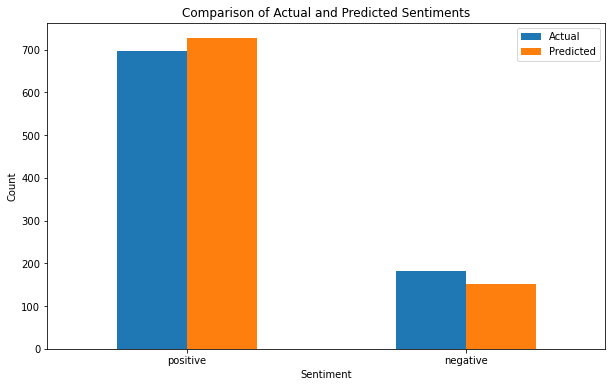

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'actual_sentiments' and 'predicted_sentiments' are available
sentiment_comparison = pd.DataFrame({'Actual': actual_sentiments, 'Predicted': predicted_sentiments})

# Plotting the sentiment comparison in a bar chart
sentiment_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Sentiments')
plt.xticks(ticks=[0, 1], rotation=0)
plt.show()

- The comparison of the height of bars for each sentiment reveals the model's accuracy.
- We can also see the imbalance in our data

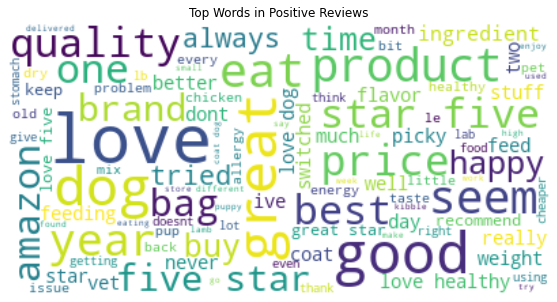

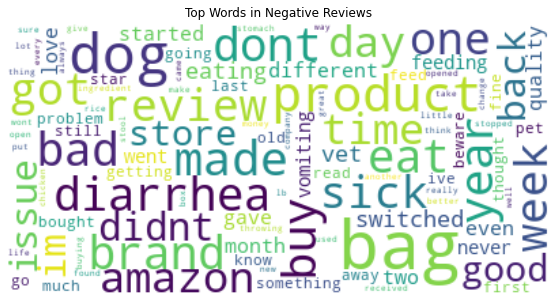

In [40]:
# Filter the DataFrame for positive and negative reviews
positive_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'positive']['preprocessed_text']
negative_reviews = preprocessed_reviews[preprocessed_reviews['sentiment'] == 'negative']['preprocessed_text']

# Join all reviews in each category into a single string
positive_text = " ".join(review for review in positive_reviews)
negative_text = " ".join(review for review in negative_reviews)

# Create word clouds
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)

# Display the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words in Positive Reviews")
plt.show()

# Display the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words in Negative Reviews")
plt.show()


The Word clouds visually emphasize the most frequent words in each sentiment category. We can see here again health plays big role.

#### Bar Graphs - Quantitative Analysis of Top Words
Bar graphs for the top words in positive and negative reviews provide a clear, quantitative view of the most frequent words.

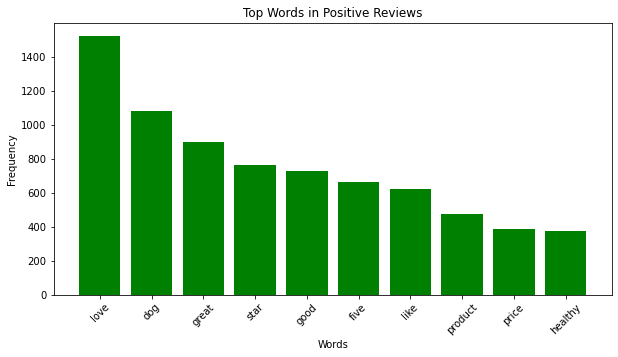

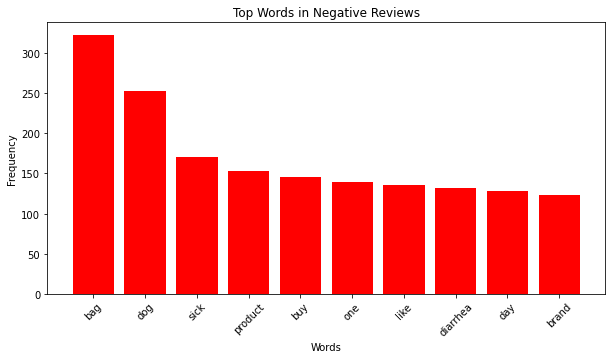

In [41]:
from collections import Counter

# Tokenize and extract words from positive and negative reviews
positive_tokens = word_tokenize(" ".join(preprocessed_reviews[preprocessed_reviews['sentiment'] == 'positive']['preprocessed_text']))
negative_tokens = word_tokenize(" ".join(preprocessed_reviews[preprocessed_reviews['sentiment'] == 'negative']['preprocessed_text']))

# Count the frequency of words in positive and negative reviews
positive_freq = Counter(positive_tokens)
negative_freq = Counter(negative_tokens)

# Extract the top N words from both categories
top_n = 10
top_positive_words = pd.DataFrame(positive_freq.most_common(top_n), columns=['Word', 'Frequency'])
top_negative_words = pd.DataFrame(negative_freq.most_common(top_n), columns=['Word', 'Frequency'])

# Plotting bar graph for positive words
plt.figure(figsize=(10, 5))
plt.bar(top_positive_words['Word'], top_positive_words['Frequency'], color='green')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plotting bar graph for negative words
plt.figure(figsize=(10, 5))
plt.bar(top_negative_words['Word'], top_negative_words['Frequency'], color='red')
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Insights from the Bar Graph of Top Words in Positive Reviews:
- **Word Preference**: Words like `"love," "good," "great," and "like"` are prominently used in positive reviews, indicating strong satisfaction and preference for certain attributes of the product.
- **Potential Marketing Focus**: Words like `"healthy," "love," and "best"` could be leveraged in marketing campaigns to highlight the aspects that resonate most with satisfied customers.

### Insights from the Bar Graph of Top Words in Negative Reviews:
- **Common Complaints**: Words such as `"bad," "issue," and "never"` point to strong dissatisfaction, possibly related to specific features or experiences with the product.
- **Customer Service Opportunities**: Negative sentiment words may also highlight areas where customer service could engage to improve the customer's perception and experience.

# Reccomendations

Based on the sentiment analysis of dog food reviews, here are some key recommendations:

### Strategic Recommendations for Stakeholders

**1. Product Improvement & Innovation**
   - **Focus on Negative Feedback**: Address the specific issues highlighted in negative reviews. 
       - **"sick" or "bad"** are frequent in negative contexts, consider revising the product recipe or ingredients.
   - **Leverage Positive Feedback**: Reinforce the aspects that receive positive mentions, such as "healthy" or "love", in product development and innovation.

**2. Marketing and Brand Positioning**
   - **Highlight Strengths in Marketing**: Use the positive sentiments and words.
       - **"love", "healthy", and "delicious"** in marketing campaigns to reinforce the brand's strengths.
   - **Address Concerns Publicly**: Respond to common negative sentiments in marketing communications, showing commitment to improvement.


**3. Quality Control and Assurance**
   - **Regular Quality Checks**: Implement or enhance quality control measures to address issues identified in negative reviews, ensuring consistent product quality.
   - **Customer Feedback Loop**: Establish a system to regularly collect and analyze customer feedback for continuous quality improvement.

### Next Steps
#### Continuous Data Collection and Analysis
- **Expand the Dataset**: Continuously collect new reviews to keep the analysis up-to-date. Consider integrating data from multiple sources, not just Amazon, to get a more comprehensive view.

- **Real-Time Analysis**: Implement a system for real-time analysis of customer reviews. This can provide immediate insights into customer sentiment and alert you to any emerging issues or trends.